# **Assignment 3** - Introduction to Machine Learning: Regression
#### **Author**: Shakthi Visagan
#### **Purpose**: Introduction to machine learning and how to think like a machine learning engineer

Machine learning is the study of how to extract insights from data. Data on its own is largely useless, and arguably of negative value, as it takes time, effort, and money to collect, store, and maintain. However, manipulating data to yield deeper generalizations about the data itself has proven to be a greatly lucrative occupation. A simple Google search will reveal the salaries of those who spend their time creating machine learning models. Though machine learning is marketed as a modern advance, it has its roots and foundation in the mathematics and engineering developed by mythic legends like Euler, Gauss, Legendre, and their ilk. Regardless, machine learning owes its current capitalistic success and popularity mainly to the manifestation of Moore's law and the ability to collect and process unfathomable amounts of data. Some examples of the uses of machine learning are sabremetrics, the use of data-based insights to improve the performance of athletes and sports teams, econometrics, the use of financial and economical data to drive public policy, and neuro-engineering, using machine learning to process the neural signals of the brain to create a two-way interface between a prosthetic machine and the brain. This is by no means a comprehensive list, and you are encouraged to look into areas where machine learning is being used and find your own interests. 

Be resourceful as you complete this assignment (the Internet is the sum of all human knowledge (supposedly)).

---

#### (1) Define, compare, and give possible real world examples for the the following terms:
1. Regression and Classification
2. Discrete distribution (variable) and Continuous distribution (variable)
3. Supervised learning and Unsupervised learning (sometimes called Semi-supervised learning)
4. Linear function and Nonlinear function

Write your answers below.

---

In [1]:
### DON'T EDIT THIS CODE ###
import numpy as np
from matplotlib import gridspec, pyplot as plt
plt.rc('font', **{'family': 'sans-serif', 'size': 10})
# for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('xtick', **{'labelsize': 'medium'})
plt.rc('ytick', **{'labelsize': 'medium'})
import seaborn as sns
df = sns.load_dataset("anscombe")
print(df)

x0=df.loc[ 0:10]["x"][:].tolist()
x1=df.loc[11:21]["x"][:].tolist()
x2=df.loc[22:32]["x"][:].tolist()
x3=df.loc[33:43]["x"][:].tolist()
y0=df.loc[ 0:10]["y"][:].tolist()
y1=df.loc[11:21]["y"][:].tolist()
y2=df.loc[22:32]["y"][:].tolist()
y3=df.loc[33:43]["y"][:].tolist()
list_of_xs = [x0,x1,x2,x3]
list_of_ys = [y0,y1,y2,y3]
colors=['r','b','g','y']


f1 = plt.figure(dpi=250)
# Make grid
gridd=(2,2)
gs1 = gridspec.GridSpec(*gridd)
# Get list of axis objects
ax = [f1.add_subplot(gs1[x]) for x in range(gridd[0] * gridd[1])]
# Plot
for i in range(4):
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([0,15])
    ax[i].scatter(list_of_xs[i], list_of_ys[i], edgecolors='k', marker="o", c=colors[i], alpha=2./3)
plt.tight_layout()
plt.show()
### DON'T EDIT THIS CODE ###

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

<Figure size 1600x1200 with 4 Axes>

---

#### (2) Exploratory Data Analysis

You'll be using the datasets above to begin your foray into machine learning. The datasets are organized in the following way: you have four sets of eleven data points each. The eleven data points are in $x$ and $y$ coordinates and are contained in the lists $x_{0}, y_{0}$, $x_{1}, y_{1}$, $x_{2}, y_{2}$, $x_{3}, y_{3}$. They are graphed aboved for you. Look at the plotting code to see how the lists are related, and which lists contain what data points. 

Every one of your machine learning projects, be it in research or in industry, will begin with _exploratory data analysis_. This analysis is where you figure out what your data looks like, what types of models will give you the most insight, and if there is any preprocessing your data requires.

(2a) If I want to fit straight lines to these data such that given a new data $x$-coordinate, $x^{*}$, I can find a $y^{*}$ on that straight line that resembles the data that the line travels through, which terms from problem (1) best describe my goals?

Write your answer below.

(2b) For each of the $x$ lists (the lists of the $x$-coordinates), find the following:
1. the sample mean or average
2. the sample variance
3. the sample standard deviation

Do the same for each of the $y$ lists (the lists of the $y$-coordinates).

Write your code and answers as comments below.

(2c) Is there anything suspicious about the means and the other descriptive statistics you've found about the data relative to what the data look like?

Write your answer below.

(2d) Look up how to calculate the sample correlation coefficient using `numpy`. It should be one function and should only take one $x$ and one $y$ argument, the pairs of lists. Your output should be a matrix. Do this for each pair of lists $x_{i},y_{i}$ for $i\in\{0,1,2,3\}$. Are the correlations across the different data the same? Correlation (measured through the Pearson Correlation Coefficient) is a measure of linearity. Which of the datasets presented above make the correlation you've just calculated an irrelevant measure for the data (hint: which data set has nonlinear relationships, or no relationships between the $x$ and $y$ data?)

Write your code and answers as comments below.

---

#### (3) Simple Linear Regression

Undergraduate: Everything is linear!

Graduate: Everything is nonlinear...

Deathbed: Everything is locally linear.

As you go through this problem, this adage will make more sense.

(3a) Let's make the assumption that the data is linear. What this means is that we are assuming the underlying phenomenon that is generating the data is linear. Is this assumption valid for the four datasets? If the data were perfectly linearly correlated then all we’d have to do is take any two points from the data sets, calculate the slope, $\beta_{1}$ and then using the slope calculate the $y$-intercept, $\beta_{0}$, and we’d get a line of the form $$\beta_{0}+\beta_{1}\mathbf{x} = \mathbf{y} \tag{1}$$ This process should be familiar to you. However, it's clear that the data isn't perfectly linearly correlated. Nevertheless, we do know that any two points create a line. Let's create three lines that pass through the data using the fact that any two points define a line:
1. find and plot the lines for the datasets that connect the first data point and the mean of the data points (recall that the mean of the set of points is just the mean of the $x$-elements and the mean of the $y$-elements)
2. find and plot the lines for the datasets that connect the first and last data point 
3. find and plot the lines for the datasets that connect the mean of the data points and the last data point

You should be using list slicing throughout your calculations/plotting. Python makes it easy to access first/last elements of a list. Python also makes it easy to calculate the mean of a list. The first and last data point aren't necessarily the smallest and largest values, respectively, for $x$ and $y$ in the dataset.

Write your code below. Show all three lines on the four subplots in one plot similar to the one above. The first line (the line that goes through the first data point and the mean of the data is already done for you).


In [2]:
# line 1 coefficients: through the 1st point and the mean
beta_1_1 = []
beta_0_1 = []
for i in range(4):
    y = list_of_ys[i]
    x = list_of_xs[i]
    beta_1_1.append( ((sum(y)/len(y)) - y[0])/((sum(x)/len(x)) - x[0]) )
    beta_0_1.append( y[0] - beta_1_1[i]*x[0] )
    assert beta_1_1[i]*x[0]+beta_0_1[i] == y[0]

# line 2 coefficients: through the 1st point and the last point
beta_1_2 = []
beta_0_2 = []
for i in range(4):
    y = list_of_ys[i]
    x = list_of_xs[i]
    # write code to calculate the coefficients
    ### Write code below
    beta_1_2.append(np.random.random())
    beta_0_2.append(np.random.random())
    # Uncomment the assert when you're done
    ### Write code above ###
    # assert beta_1_2[i]*x[0]+beta_0_2[i] == y[0]

# line 3 coefficients: through the mean and the last point
beta_1_3 = []
beta_0_3 = []
for i in range(4):
    y = list_of_ys[i]
    x = list_of_xs[i]
    # write code to calculate the coefficients
    ### Write code below
    beta_1_3.append(np.random.random())
    beta_0_3.append(np.random.random())
    # Uncomment the assert when you're done
    ### Write code above ###
    # assert beta_1_3[i]*x[0]+beta_0_3[i] == y[0]

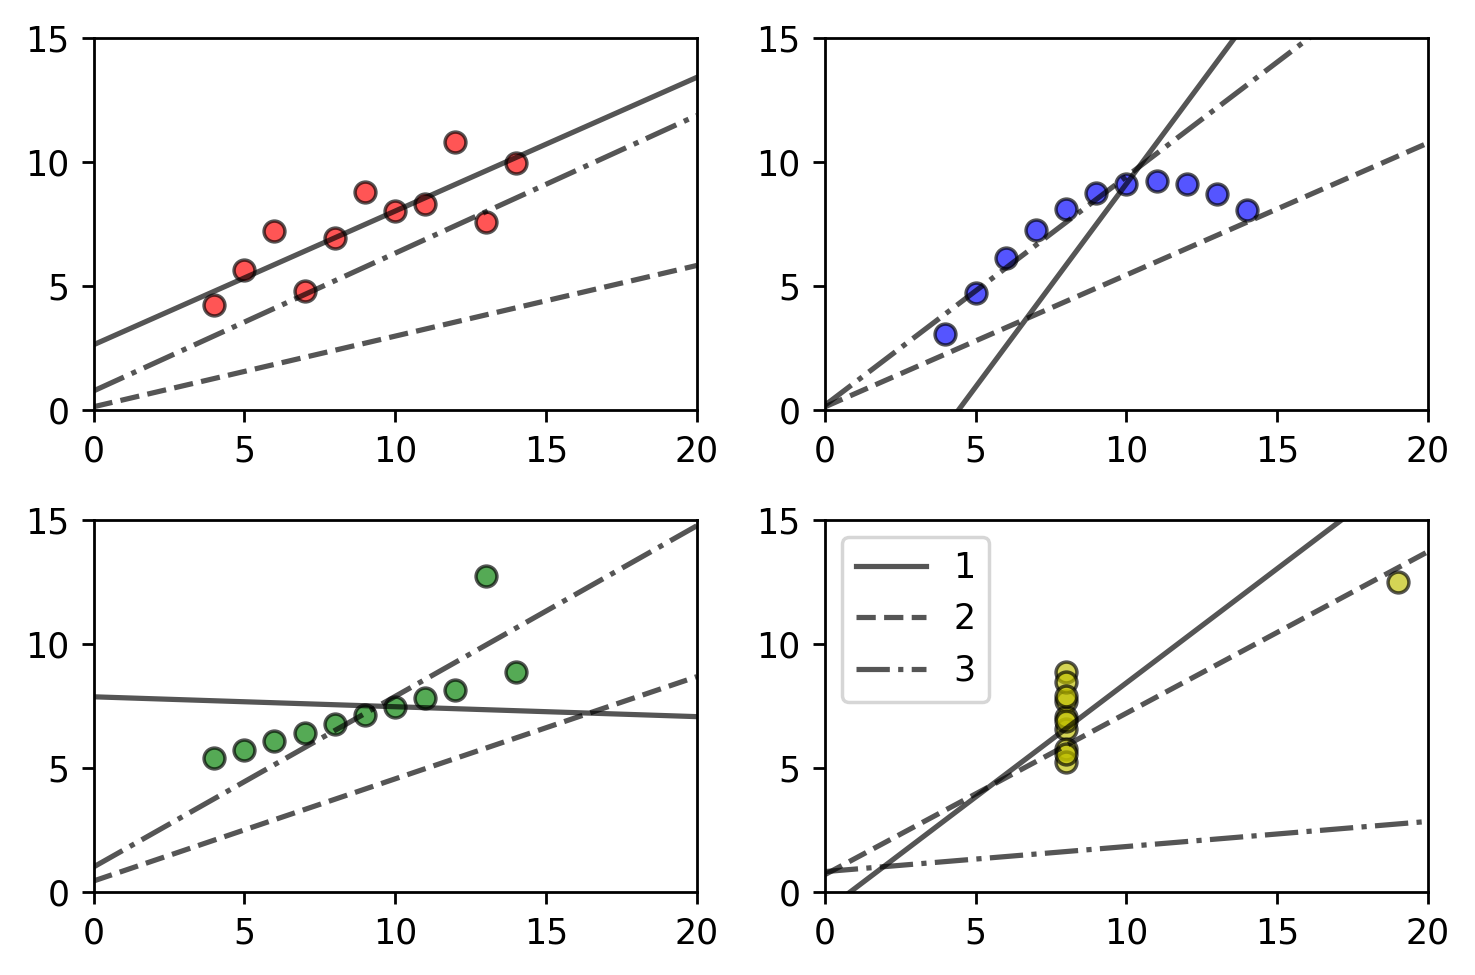

In [3]:
### The plotting code below should execute ###
f1 = plt.figure(dpi=250)
# Make grid
gridd=(2,2)
gs1 = gridspec.GridSpec(*gridd)
# Get list of axis objects
ax = [f1.add_subplot(gs1[x]) for x in range(gridd[0] * gridd[1])]
# Plot
for i in range(4):
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([0,15])
    ax[i].scatter(list_of_xs[i], list_of_ys[i], edgecolors='k', marker="o", c=colors[i], alpha=2./3)
    tmp_x = np.linspace(0,20)
    # line 1: through the 1st point and the mean
    ax[i].plot(tmp_x, beta_0_1[i]+beta_1_1[i]*tmp_x, 'k-', alpha=2./3, label='1')    
    # line 2: through the 1st point and the last point
    ax[i].plot(tmp_x, beta_0_2[i]+beta_1_2[i]*tmp_x, 'k--', alpha=2./3, label='2')    
    # line 1: through the mean and the last point
    ax[i].plot(tmp_x, beta_0_3[i]+beta_1_3[i]*tmp_x, 'k-.', alpha=2./3, label='3')
plt.legend()
plt.tight_layout()
plt.show()
### No changes are required for the plotting code ###

(3b) Which of the lines does the "best" at fitting the data? Would you stop after this analysis (do you think you can do a better job in fitting the lines)? Consider that your defintion of what "best" means isn't rigorously defined. What would the "best" line do in terms of fitting the data the "best"?

Write your answers below. No code required.

(3c) As we know, our data are *NOT* aligned in a perfectly linearly correlated manner. However, the "best" line would have coefficients $\beta_0$ and $\beta_1$ that fit well for all the points regardless.

Why don’t try to find values for $\beta_0$ and $\beta_1$ that work for _all_ our points in our set, and not just one or two of them; that is, let’s try to solve the following system of equations:
$$\begin{align} \beta_0+\beta_1 x^0 &= y^0 \\ \beta_0+\beta_1 x^1 &= y^1 \\ \vdots \\ \beta_0+\beta_1 x^m &= y^m \end{align} \tag{2}$$

NOTE: $k\in\{0,1,2,\ldots,m\}$ is not an exponent! It is an iterator over the data points or the indices of the lists.

This is an *over-determined* system of equations (we have more equations than we have variables) because we're trying to find a line that passes through more than two points. Observe the following image

![residuals](images/residuals.png)

If our goal is to find the best possible red line, then the _distance_ from the blue data points to the red line must be as _small_ as possible for _each point_, to ensure that we have properly tried to fit all of our data. Now observe the distances; it seems like the data point is some distance _vertically_ further away, that is, in the direction of the $y$-axis. Mathematically, we need to _minimize the distance between our observed data (blue dots) and our predicted data (our line)_. We’ll call the distance $$\mathbf R^{k} = y_{\mathrm{observed}}^{k} - y_{\mathrm{predicted}}^{k}=y_{\mathrm{observed}}^{k}-(\beta_{0}+\beta_{1}x_{\mathrm{observed}}^{k}) \tag{3} $$ This is called the _residual_ for each data point, where $k$ is an iterator over the datapoints. Because we want to minimize the distance for all of them, we’ll just _add_ all the $\mathbf R^{k}$ from $k=0,1,2,\ldots,m$ and then minimize the *sum*. However, this problem arises a lot in probability and the fact is that
$$ \sum_{k=1}^m \mathbf R^{k}=\sum_{k=1}^m (y_{\mathrm{observed}}^{k} - y_{\mathrm{predicted}}^{k})= \sum_{k=1}^m (y_{\mathrm{observed}}^{k}-(\beta_{0}+\beta_{1}x_{\mathrm{observed}}^{k}))=0 \tag{4}$$
**always**. Let's show a simpler version of this through code.

Take your $y$ and $x$ lists and show that subtracting each element in them by the mean of their lists and taking the sum of the differences evaluates to $0$ (or some really small number). Do you have an explanation for why this happens? (hint: if you have some distribution of data, and you shift the data by the mean, what is the new mean of the shifted data?)

Write your code and answers as comments below.

(3d) So it seems like minimizing the residuals as defined above won't really help. Also note that minimizing the sum of residuals with respect to the $\beta$ coefficients doesn't really tell us anything about those coefficients. The way to alleviate this is to take the _square_ of the residuals. So in this case we’re no longer interested in minimizing $\sum \mathbf R^k$ but rather in minimizing $\sum (\mathbf{R}^k)^2$

$$ \sum_{k=1}^m (\mathbf{R}^k)^2=\sum_{k=1}^m (y_{\mathrm{observed}}^k - y_{\mathrm{predicted}}^k)^2=\sum_{k=1}^m(y^k-(\beta_0+\beta_1 x^k))^2=\sum_{k=1}^m(y^k-\beta_0-\beta_1 x^k)^2=S(\beta_{0},\beta_{1}) \tag{5}$$

Minimizing $S(\beta_0,\beta_1)$ with respect to the $\beta$ parameters according to the values of the observed data $(x^k,y^k)$ for $k\in\{0,1,2,\ldots,m\}$ will then yield the line of best fit.

What we've arrived at is the formulation known as _least squares_. This method first gained popularity in the late 18th, early 19th century, as they were used by Gauss and Legendre for analyzing the motion and orbits of planets.

Our problem is evaluate now the following: $$\min_{\beta_{0},\beta_{1}}S(\beta_{0},\beta_{1})=\min_{\beta_{0},\beta_{1}}\sum_{k=1}^m (\mathbf{R}^k)^2=\min_{\beta_{0},\beta_{1}}\sum_{k=1}^m(y^k-\beta_0-\beta_1 x^k)^2 \tag{6}$$

Recall from introductory calculus and physics how to find the minimum of a function with respect to an argument (recall how one would find the time of maximal height of a ball tossed upwards given its position as a function of time).

How would you find values for $\beta_{0}$ and $\beta_{1}$ such that they minimize the sum of the squared residuals?

Write your answer below.

(3e) We take the implicit derivative with respect to the parameter of interest, set it equal to $0$, and solve for the parameter of interest. For exaxmple, the value of the $\beta_{0}$ parameter will be done for you. You will solve for the value of the $\beta_{1}$ parameter (which will use the value of the $\beta_{0}$ parameter in its derivation).

$$ \dfrac{\partial S(\beta_0,\beta_1)}{\partial \beta_0}=\dfrac{\partial}{\partial \beta_1}\sum_{k=1}^m(y^k-\beta_0-\beta_1 x^k)^2=0 \tag{7}$$
We are only interested in $\beta_0$ so everything else is a “constant” term $c_k=y_k-\beta_1 x_k$.
$$ \dfrac{\partial}{\partial \beta_0}\sum_{k=1}^m(-\beta_0+y^k-\beta_1 x^k)^2 = \dfrac{\partial}{\partial \beta_0}\sum_{k=1}^m(-\beta_0+c^k)^2=\dfrac{\partial}{\partial \beta_0}\sum_{k=1}^m(\beta_0^2 - 2\beta_0 c^k +{(c^k)}^2)=0 \tag{8}$$
The derivative of a sum is the sum of the derivative of its summands:
$$ \sum_{k=1}^m\dfrac{\partial}{\partial \beta_0}(\beta_0^2 - 2\beta_0 c^k + (c^k)^2)=\sum_{k=1}^m (2\beta_0 - 2c^k)=0 \tag{9}$$
Clean up the sums:
$$\sum_{k=1}^m (2\beta_0 - 2c^k)=2\sum_{k=1}^m \beta_0 - 2\sum_{k=1}^m c^k=\sum_{k=1}^m \beta_0 - \sum_{k=1}^m c^k=0 \tag{10}$$
$$ \sum_{k=1}^m \beta_0 - \sum_{k=1}^m c^k=\sum_{k=1}^m \beta_0  - \sum_{k=1}^m(y^k-\beta_1 x^k)=m\beta_0 - \sum_{k=1}^m(y^k-\beta_1 x^k)=0\tag{11}$$
$$ m\beta_0=\sum_{k=1}^m(y^k-\beta_1 x^k) \tag{12}$$
Isolate $\beta_{0}$ and call it $\hat\beta_{0}$ because that is our estimate for the parameter. 
$$ \hat\beta_0=\dfrac{ \sum_{k=1}^m y^k-\beta_1\sum_{k=1}^m x^k}{m} \tag{13}$$
If you want, this can be further simplified to
$$ \hat\beta_0=\dfrac{ \sum_{k=1}^m y^k}{m}-\beta_1\dfrac{\sum_{k=1}^m x^k}{m}=\bar y - \beta_1 \bar x \tag{14}$$
where $\bar x$ denotes the average or the mean of the $x$-values. Ensure that every line in the derivation above makes sense. Perform a similar analysis for the $\beta_{1}$ parameter.

Write your answer below for what $\hat\beta_{1}$ equals.

(3f) Convert the definitions for the parameters $\beta_{0}$ and $\beta_{1}$ to Python functions. $\beta_{0}$ is done for you. 

Write your code below.

In [4]:
def beta_1_hat(x,y):
    """
    Input:
    x - list: a list of m x-coordinates
    y - list: a list of m y-coordinates
    Output:
    beta_1 - float: the beta_1 parameter
    """
    ### Write code below ###
    beta_1 = np.random.random()
    ### Write code above ###
    return beta_1

def beta_0_hat(x,y,beta_1):
    """
    Input:
    x - list: a list of m x-coordinates
    y - list: a list of m y-coordinates
    beta_1 - float: the beta_1 parameter
    Output:
    beta_0 - float: the beta_0 parameter
    """
    return (sum(y)/len(y))-beta_1*(sum(x)/len(x))

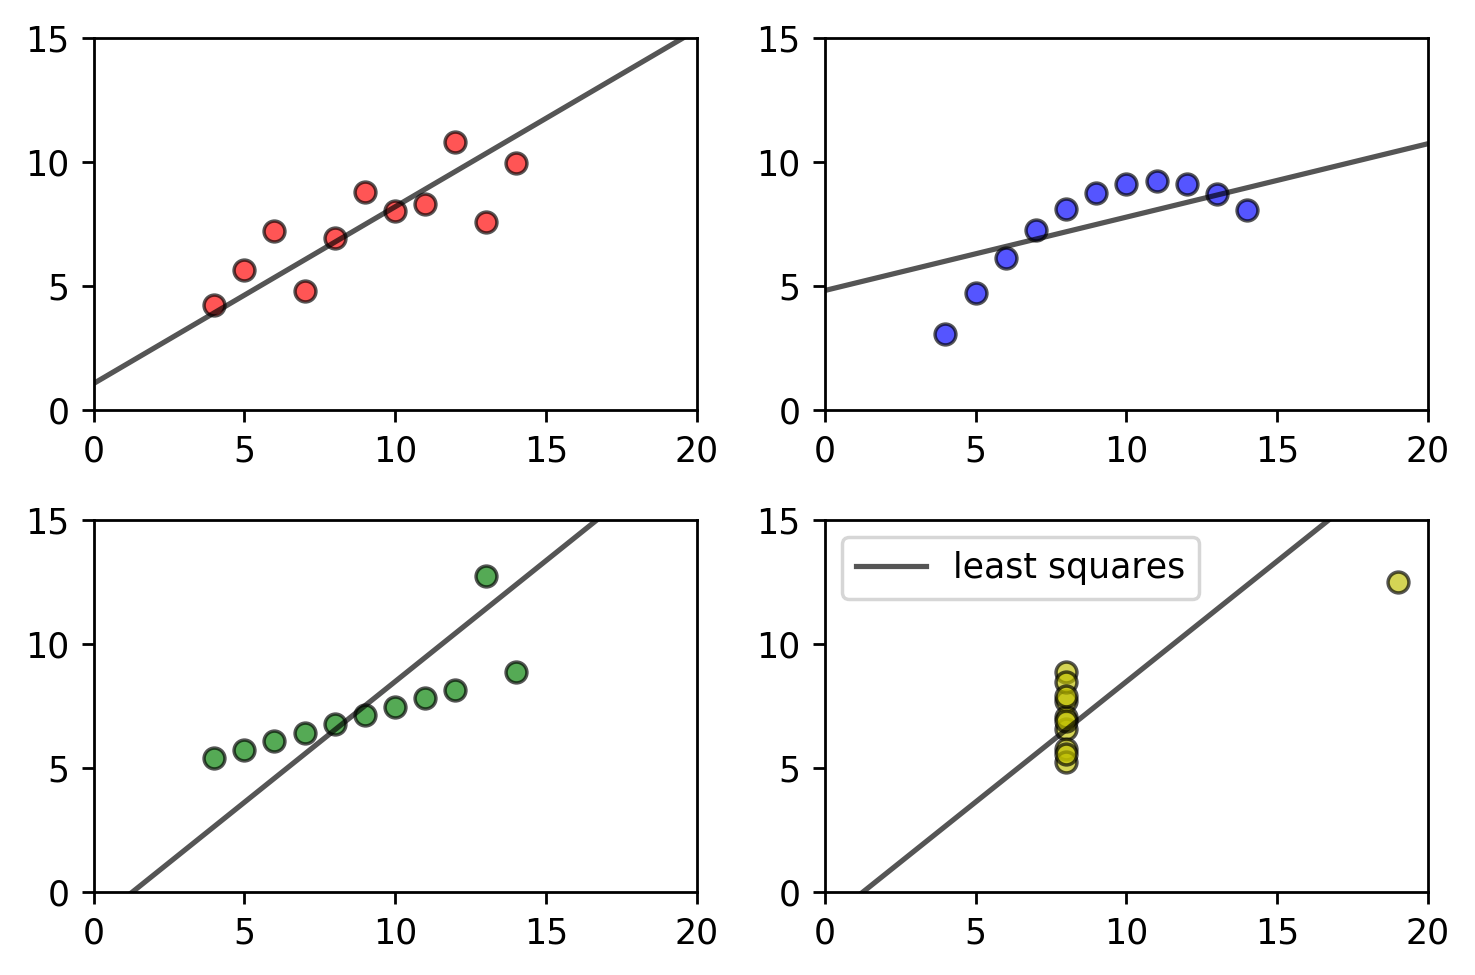

In [5]:
### The plotting code below should execute ###
f1 = plt.figure(dpi=250)
# Make grid
gridd=(2,2)
gs1 = gridspec.GridSpec(*gridd)
# Get list of axis objects
ax = [f1.add_subplot(gs1[x]) for x in range(gridd[0] * gridd[1])]
# Plot
for i in range(4):
    x = list_of_xs[i]
    y = list_of_ys[i]
    beta_1 = beta_1_hat(x,y)
    beta_0 = beta_0_hat(x,y,beta_1)
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([0,15])
    ax[i].scatter(x, y, edgecolors='k', marker="o", c=colors[i], alpha=2./3)
    tmp_x = np.linspace(0,20)
    # linear regression 
    ax[i].plot(tmp_x, beta_0+beta_1*tmp_x, 'k-', alpha=2./3, label='least squares')    
plt.legend()
plt.tight_layout()
plt.show()
### No changes are required for the plotting code ###